<a href="https://colab.research.google.com/github/signofcommunication/Tugas-Matana-University/blob/master/Daun_Sakit_%26_Sehat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Daun Sakit


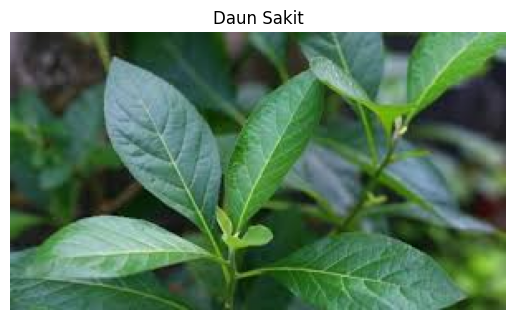

In [5]:
import os
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Fungsi untuk ekstrak fitur sederhana dari gambar (rata-rata HSV)
def extract_features(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Gambar tidak ditemukan: {image_path}")

    # Preprocessing: Resize ke 128x128, ubah ke HSV, normalisasi
    img_resized = cv2.resize(img, (128, 128))
    img_hsv = cv2.cvtColor(img_resized, cv2.COLOR_BGR2HSV)
    img_normalized = img_hsv / 255.0  # Normalisasi ke [0,1]

    # Ekstrak fitur: Rata-rata dari setiap channel HSV
    features = np.mean(img_normalized, axis=(0,1))
    return features

# Fungsi untuk load dataset dari folder
def load_dataset(healthy_folder, diseased_folder):
    features = []
    labels = []  # 0: sehat, 1: sakit

    # Load gambar sehat
    for file in os.listdir(healthy_folder):
        if file.endswith(('.jpg', '.jpeg', '.png')):
            path = os.path.join(healthy_folder, file)
            try:
                feat = extract_features(path)
                features.append(feat)
                labels.append(0)
            except ValueError as e:
                print(f"Skipping file {path} due to error: {e}")


    # Load gambar sakit
    for file in os.listdir(diseased_folder):
        if file.endswith(('.jpg', '.jpeg', '.png')):
            path = os.path.join(diseased_folder, file)
            try:
                feat = extract_features(path)
                features.append(feat)
                labels.append(1)
            except ValueError as e:
                print(f"Skipping file {path} due to error: {e}")

    return np.array(features), np.array(labels)

# Path ke dataset dan gambar tes
healthy_folder = 'daun_dataset/sehat'
diseased_folder = 'daun_dataset/sakit'
test_image = 'daun_dataset/sehat/sehat 2.jpeg'

# Load dataset
X, y = load_dataset(healthy_folder, diseased_folder)

if len(X) == 0:
    print("Dataset kosong. Pastikan folder dataset berisi gambar.")
    exit(1)

# Split data untuk training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check if there are enough samples for training
if len(X_train) < 3:
    print(f"Dataset terlalu kecil untuk training dengan n_neighbors=3. Hanya ada {len(X_train)} sampel training.")
    exit(1)


# Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model KNN
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Ekstrak fitur dari gambar input
input_feat = extract_features(test_image)
input_feat = scaler.transform([input_feat])

# Prediksi
prediction = model.predict(input_feat)[0]
result = "Daun Sehat" if prediction == 0 else "Daun Sakit"
print(result)

# Opsional: Tampilkan gambar input
import matplotlib.pyplot as plt
img = cv2.imread(test_image)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title(result)
plt.axis('off')
plt.show()